In [46]:
import numpy as np
from sklearn import svm

class SVM:

    def __init__(self, C = 1.0, kernel=None):
        # C = error term
        
        self.C = C
        self.w = 0
        self.b = 0
        self.kernel = kernel
    #Hàm chuyển đổi sang RBF 
    def RBF(X, gamma):
    
        # Free parameter gamma
        if gamma == None:
            gamma = 1.0/X.shape[1]
            
        # RBF kernel Equation
        K = np.exp(-gamma * np.sum((X - X[:,np.newaxis])**2, axis = -1))
        
        return K
    #Hàm chuyển đổi sang poly 
    def transform_poly(self, X, Y=None):
        # Finding the Square of X1, X2
            X['x1^2'] = X['x1'] ** 2
            X['x2^2'] = X['x2'] ** 2
            # Finding the product of X1 and X2
            X['x1 * x2'] = X['x1'] * X['x2']
            # Converting dataset to numpy array
            X = X.to_numpy()
            if Y.size != 0:
                Y = Y.to_numpy()
                return X, Y
            else:
                return X
    # Hinge Loss Function / Calculation
    
    # hàm loss function 
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max( 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        
        if(self.kernel == "poly"):
            print("SVM(kernel='poly')")
            X, Y = self.transform_poly(X, Y)
        if(self.kernel =='rbf'):
            print("SVM(kernel='rbf')")
            X =self.RBF(X, gamma=None)
        
       
       
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        if(self.kernel == "poly"):
            X = self.transform_poly(X, np.array([]))
        if(self.kernel == "rbf"):
            X = self.RBF(X, np.array([]))
        linear_prediction = np.dot(X, self.w[0]) + self.b
        return np.sign(linear_prediction)    

In [47]:
# prediction.py

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Creating dataset
X, y = datasets.make_blobs(

        n_samples = 100, # Number of samples
        n_features = 2, # Features
        centers = 2,
        cluster_std = 1,
        random_state=40
    )

# Classes 1 and -1
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

svm = SVM(kernel = "linear")

w, b, losses = svm.fit(X_train, y_train)
prediction = svm.predict(X_test)

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [w, b])

Loss: -2.468283742621986
Prediction: [-1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1.
  1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1.
  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
Accuracy: 1.0
w, b: [array([[0.44477983, 0.15109913]]), 0.05700000000000004]


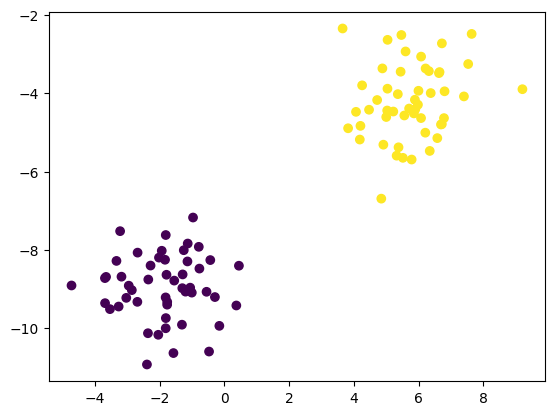

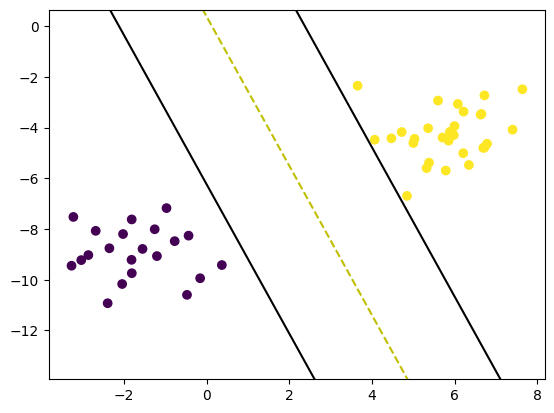

In [48]:
# Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0][0] * x + b + offset) / w[0][1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)

    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


visualize_dataset()
visualize_svm()

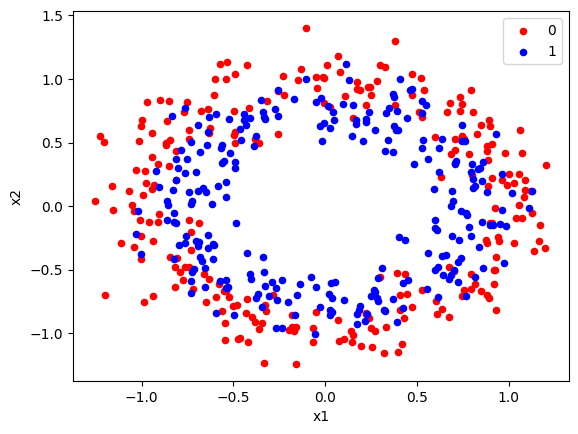

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.13, random_state=42)

df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], y=y))

colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.show()

In [50]:
X = df[['x1', 'x2']]
y = df['y']

# Replacing 0 with -1 for the SVM model to recognize labels
y = y.replace(0, -1)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [52]:
from sklearn.metrics import accuracy_score


svm = SVM(kernel="poly")

w, b, losses = svm.fit(X_train, y_train)

pred = svm.predict(X_test)

accuracy_score(pred, y_test)

SVM(kernel='poly')


0.7657142857142857

In [53]:
import plotly.express as px

df['x1^2'] = df['x1'] ** 2
df['x2^2'] = df['x2'] ** 2
df['x1 * x2'] = df['x1'] * df['x2']

fig = px.scatter_3d(df, x='x1', y='x2', z='x1 * x2', color='y')
fig.show()

In [54]:
fig = px.scatter_3d(df, x='x1^2', y='x2^2', z='x1 * x2', color='y')
fig.show()

In [55]:
from sklearn.metrics import accuracy_score


svm = SVM(kernel="rbf")

w, b, losses = svm.fit(X_train, y_train)

pred = svm.predict(X_test)

accuracy_score(pred, y_test)

SVM(kernel='rbf')


TypeError: SVM.RBF() got multiple values for argument 'gamma'